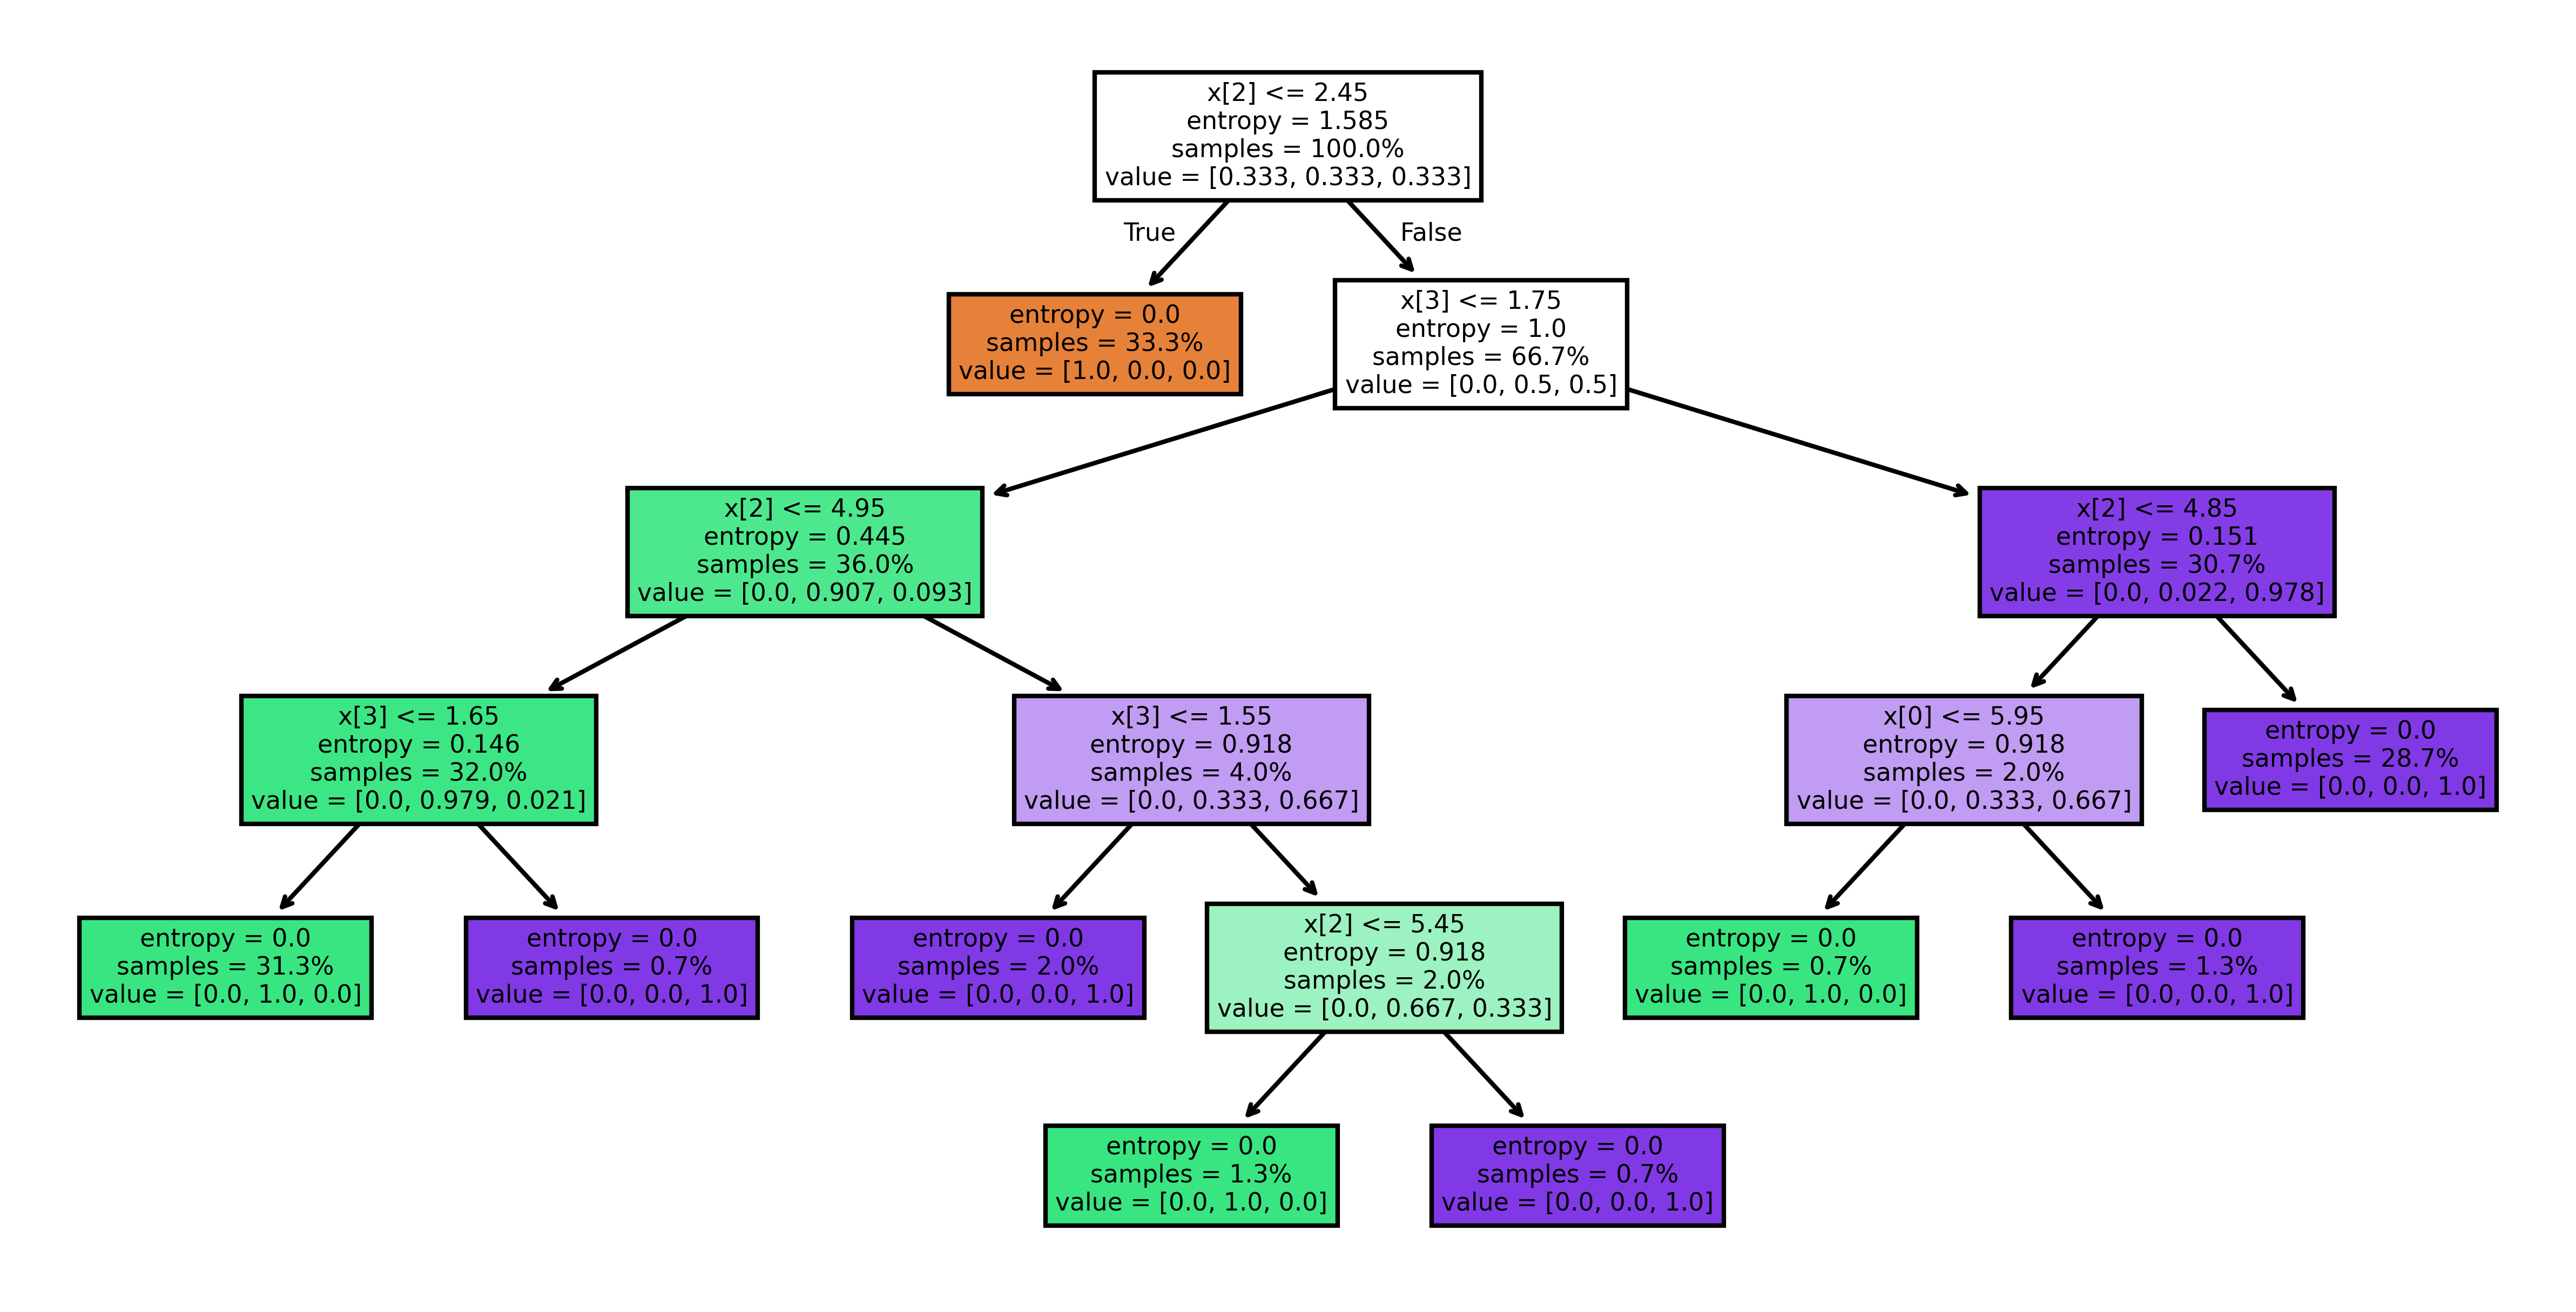

In [18]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

iris = load_iris()

x = iris.data
y = iris.target

clf = DecisionTreeClassifier(max_leaf_nodes=10, criterion='entropy')

clf.fit(x,y)
plt.figure(figsize=(10,5), dpi=600)

plot_tree(clf, proportion=True, filled=True)

plt.show()

In [1]:
import math

Introduction:

The main goal of this assignment is to understand how probability distributions and decision trees work in machine learning. I generated three different probability distributions based on the features Gender, Income and Grade, and used Education as the target label. Using these data, i built a decision tree classifier in Python to predict the level of education and to explore how different features influence the prediction.

In [6]:
import math

p = [0.33, 0.66, 0.0]

entropy = -sum(pi * math.log2(pi) for pi in p if pi > 0)

print("Entropy is:", entropy, "bits")

Entropy is: 0.9234674497121085 bits


In [7]:
from scipy.stats import entropy
print(entropy([0.0, 0.0, 1.0], base=2))

0.0


In [9]:
import math

p = [1.0, 1.0, 0.0]

entropy = -sum(pi * math.log2(pi) for pi in p if pi > 0)

print("Entropy is:", entropy, "bits")

Entropy is: -0.0 bits


In [12]:
import math

E_S = 1.485

subsets = [
    (3/10, 0.92346),
    (5/10, 0.97095),
    (2/10, 0.0)
]

remainder = sum(p * e for p, e in subsets)

IG = E_S - remainder

print("Information Gain:", IG)

Information Gain: 0.7224870000000001


In [13]:
import os
print("Current working directory:", os.getcwd())


Current working directory: C:\Users\govor\anaconda_projects\0d779c97-41ae-4743-8a08-902a13153742


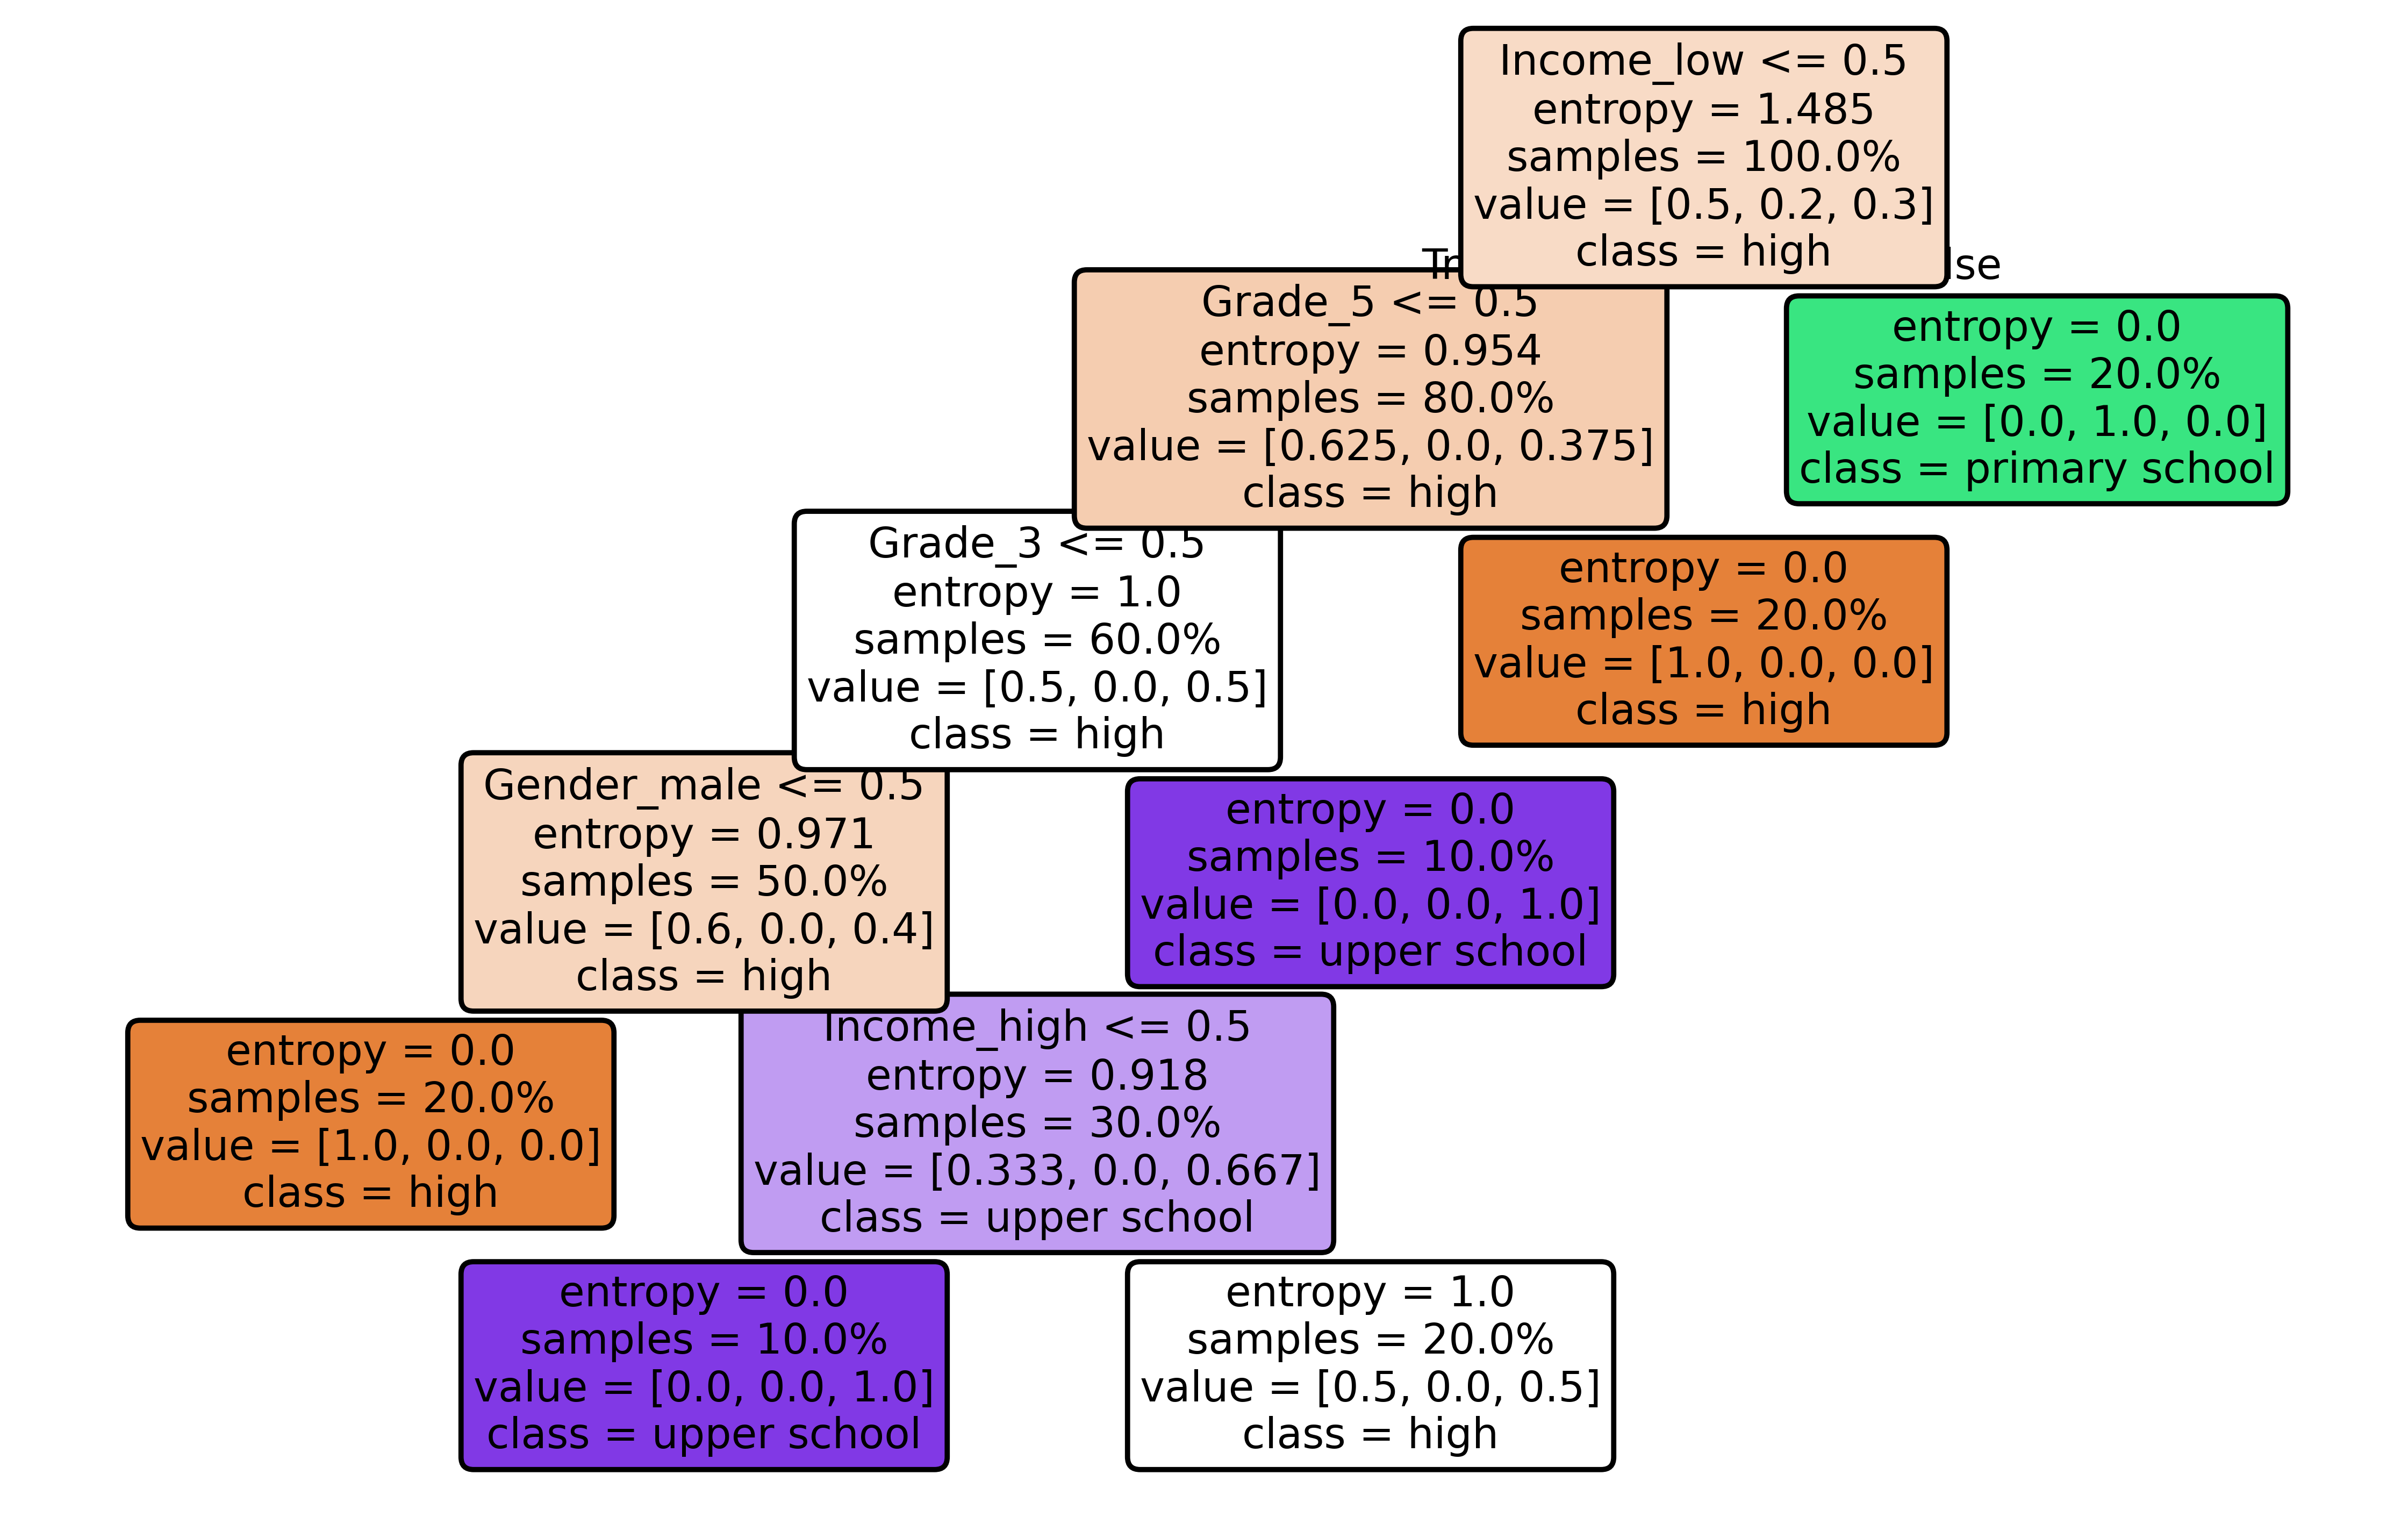

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# get data
df = pd.read_csv("Data_Probability.csv")

y = df["Education"] # Target
X = df[["Gender", "Income", "Grade"]].copy()
X["Grade"] = X["Grade"].astype(str) # # categorize Grade
X = pd.get_dummies(X, drop_first=False) # understand categories like numbers

clf = DecisionTreeClassifier(max_leaf_nodes=10, criterion="entropy", random_state=0)
clf.fit(X, y)

# 4) Visualize the tree
plt.figure(figsize=(8,5), dpi=700)
plot_tree(clf, feature_names=X.columns, class_names=sorted(y.unique()),
          proportion=True, filled=True, rounded=True, fontsize=8)
plt.show()

In [37]:
from sklearn.tree import export_text
print(export_text(clf, feature_names=list(X.columns)))

|--- Income_low <= 0.50
|   |--- Grade_5 <= 0.50
|   |   |--- Grade_3 <= 0.50
|   |   |   |--- Gender_male <= 0.50
|   |   |   |   |--- class: high
|   |   |   |--- Gender_male >  0.50
|   |   |   |   |--- Income_high <= 0.50
|   |   |   |   |   |--- class: upper school
|   |   |   |   |--- Income_high >  0.50
|   |   |   |   |   |--- class: high
|   |   |--- Grade_3 >  0.50
|   |   |   |--- class: upper school
|   |--- Grade_5 >  0.50
|   |   |--- class: high
|--- Income_low >  0.50
|   |--- class: primary school



Conclusion:

In this assignment, I created a decision tree to predict the level of education using the features Gender, Income and Grade. The results show that Grade and Income are the most important factors, while Gender has a smaller influence. The tree splits the data step by step and makes predictions based on different conditions. In the final nodes, the model can predict the education level with high confidence. This helps to understand how each feature affects the education outcome.

In [38]:
# Example: probability of rolling a 6 on a 6-sided die
favorable = 1   # only one '6'
total = 6       # total sides on the die

probability = favorable / total
print("P(rolling a 6):", probability)


P(rolling a 6): 0.16666666666666666
